# Car Price Prediction Project

## data pre-processing

### Importing the libraries and the dataset

In [3]:
import numpy as np # to deal with arrays
import pandas as pd # to deal with dataset
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

In [6]:
dataset=pd.read_csv('car_data3.csv')

In [7]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,335000,559000,27000,Petrol,Dealer,Manual,0
1,sx4,2013,475000,954000,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,725000,985000,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,285000,415000,5200,Petrol,Dealer,Manual,0
4,swift,2014,460000,687000,42450,Diesel,Dealer,Manual,0


## data exploration

In [8]:
dataset.shape

(200, 9)

In [9]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       200 non-null    object
 1   Year           200 non-null    int64 
 2   Selling_Price  200 non-null    int64 
 3   Present_Price  200 non-null    int64 
 4   Kms_Driven     200 non-null    int64 
 5   Fuel_Type      200 non-null    object
 6   Seller_Type    200 non-null    object
 7   Transmission   200 non-null    object
 8   Owner          200 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 14.2+ KB


In [11]:
dataset.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [12]:
len(dataset.select_dtypes(include='object').columns)

4

In [13]:
# numerical values
dataset.select_dtypes(include='int64').columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [14]:
len(dataset.select_dtypes(include='int64').columns)

5

In [15]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000
mean,2013.590000,6.521100e+05,1.122150e+06,41404.880000,0.035000
std,2.886792,5.005230e+05,9.365933e+05,27415.814725,0.253171
min,2003.000000,3.500000e+04,2.280000e+05,2071.000000,0.000000
25%,2012.000000,3.507500e+05,6.692500e+05,22332.750000,0.000000
50%,2014.000000,5.250000e+05,8.655000e+05,40000.000000,0.000000
75%,2016.000000,7.500000e+05,1.360000e+06,53513.750000,0.000000
max,2018.000000,3.500000e+06,9.260000e+06,197176.000000,3.000000


### dealing with missing values

In [17]:
dataset.isnull().values.sum

<function ndarray.sum>

### Restructure the dataset

In [18]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,335000,559000,27000,Petrol,Dealer,Manual,0
1,sx4,2013,475000,954000,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,725000,985000,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,285000,415000,5200,Petrol,Dealer,Manual,0
4,swift,2014,460000,687000,42450,Diesel,Dealer,Manual,0


In [27]:
dataset=dataset.drop(columns='Car_Name')

In [28]:
## add a column
dataset['current year']=2020

In [29]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current year,years old
0,2014,335000,559000,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,475000,954000,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,725000,985000,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,285000,415000,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,460000,687000,42450,Diesel,Dealer,Manual,0,2020,6


In [30]:
dataset['years old']=dataset['current year']-dataset['Year']

In [31]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current year,years old
0,2014,335000,559000,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,475000,954000,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,725000,985000,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,285000,415000,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,460000,687000,42450,Diesel,Dealer,Manual,0,2020,6


In [32]:
dataset=dataset.drop(columns=['current year','Year'])

In [33]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years old
0,335000,559000,27000,Petrol,Dealer,Manual,0,6
1,475000,954000,43000,Diesel,Dealer,Manual,0,7
2,725000,985000,6900,Petrol,Dealer,Manual,0,3
3,285000,415000,5200,Petrol,Dealer,Manual,0,9
4,460000,687000,42450,Diesel,Dealer,Manual,0,6


### Encoding the categorical data

In [34]:
dataset.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [35]:
len(dataset.select_dtypes(include='object').columns)

3

In [37]:
dataset['Fuel_Type'].nunique()

3

In [38]:
dataset['Seller_Type'].nunique()

2

In [39]:
dataset['Transmission'].nunique()

2

In [40]:
dataset.shape

(200, 8)

In [41]:
## one hot encoding
dataset=pd.get_dummies(data=dataset,drop_first=True)

In [42]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,335000,559000,27000,0,6,0,1,0,1
1,475000,954000,43000,0,7,1,0,0,1
2,725000,985000,6900,0,3,0,1,0,1
3,285000,415000,5200,0,9,0,1,0,1
4,460000,687000,42450,0,6,1,0,0,1


In [43]:
dataset.shape

(200, 9)

## Correlation matrix

In [44]:
dataset_2=dataset.drop(columns='Selling_Price')

<AxesSubplot:title={'center':'Correlated with selling price'}>

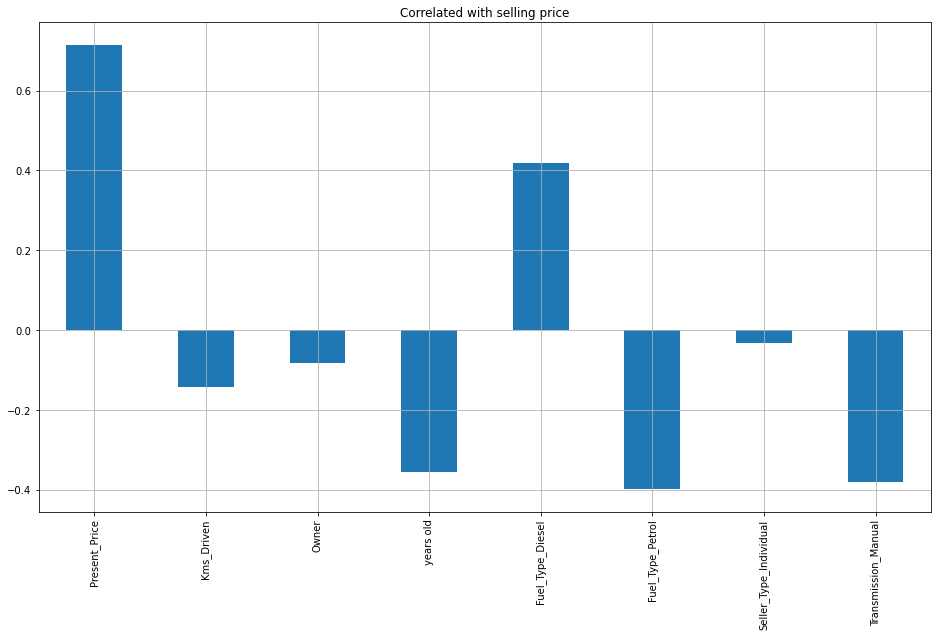

In [45]:
dataset_2.corrwith(dataset['Selling_Price']).plot.bar(
figsize=(16,9), title='Correlated with selling price',grid=True
)

In [46]:
corr=dataset.corr()

<AxesSubplot:>

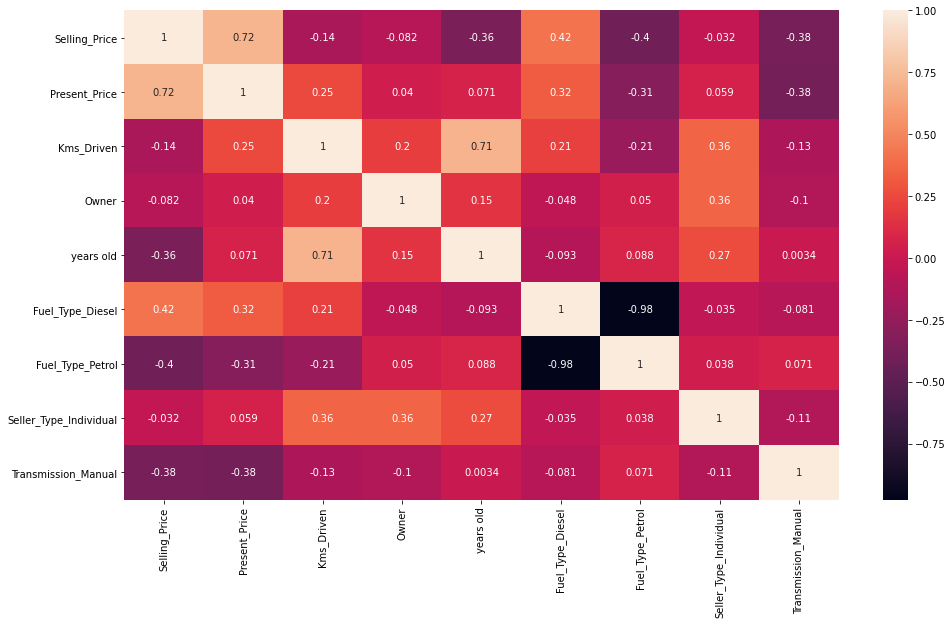

In [48]:
# heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

## splitting the dataset

In [49]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,335000,559000,27000,0,6,0,1,0,1
1,475000,954000,43000,0,7,1,0,0,1
2,725000,985000,6900,0,3,0,1,0,1
3,285000,415000,5200,0,9,0,1,0,1
4,460000,687000,42450,0,6,1,0,0,1


In [50]:
# matrix of features
x=dataset.drop(columns='Selling_Price')

In [51]:
# target variable
y=dataset['Selling_Price']

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [54]:
x_train.shape

(160, 8)

In [55]:
y_train.shape

(160,)

In [56]:
x_test.shape

(40, 8)

In [57]:
y_test.shape

(40,)

# Buliding the model

### 1) linear regression

In [59]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred=reg.predict(x_test)

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(y_test,y_pred)

-0.40671537857370854

### random forest regression

In [64]:
from sklearn.ensemble import RandomForestClassifier
reg_rf=RandomForestClassifier()
reg_rf.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
y_pred=reg_rf.predict(x_test)

In [66]:
from sklearn.metrics import r2_score

In [67]:
r2_score(y_test,y_pred)

0.7973185619180494

### Support vector machine

In [69]:
from sklearn.svm import SVC
reg_svc=SVC()
reg_svc.fit(x_train,y_train)

SVC()

In [70]:
y_pred=reg_svc.predict(x_test)

In [71]:
from sklearn.metrics import r2_score

In [72]:
r2_score(y_test,y_pred)

-0.21594551025965214

### ANN

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [80]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1000)
MLP.fit(x_train,y_train.values.ravel())

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [82]:
predictions = MLP.predict(x_test)
predictions

array([ 485000,  225000,  490000,  745000,  490000, 1011000,  875000,
        750000,  740000,  595000,  400000,  440000,  225000,  965000,
        950000,  745000,  595000,  910000,  255000,  600000,  530000,
        450000,  740000,  840000,  625000,  540000,  285000,  650000,
        685000,  255000,  745000,  400000,  475000,  865000,  400000,
        530000,  550000,  475000,  745000,  540000], dtype=int64)

In [83]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

       35000       0.00      0.00      0.00       1.0
      125000       0.00      0.00      0.00       1.0
      210000       0.00      0.00      0.00       1.0
      225000       0.00      0.00      0.00       0.0
      255000       0.00      0.00      0.00       0.0
      285000       0.00      0.00      0.00       0.0
      300000       0.00      0.00      0.00       2.0
      325000       0.00      0.00      0.00       1.0
      350000       0.00      0.00      0.00       1.0
      360000       0.00      0.00      0.00       1.0
      375000       0.00      0.00      0.00       1.0
      400000       0.00      0.00      0.00       0.0
      440000       0.00      0.00      0.00       1.0
      450000       0.00      0.00      0.00       2.0
      460000       0.00      0.00      0.00       1.0
      475000   

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_cla